In [2]:
from ThesisFunctions import *


In [11]:
# Using GROEBNER BASIS to find number of minimas (
# Simple case: 4 datapoint with small noise



# Define the symbolic variables
x0, b = sp.symbols('x0 b')

# Datapoints must be rational for Groebner function to work
x_i = [1, 2, sp.Rational(401, 100), 7]  # Data
t_i = [0, 1, 2, 3]  # Time

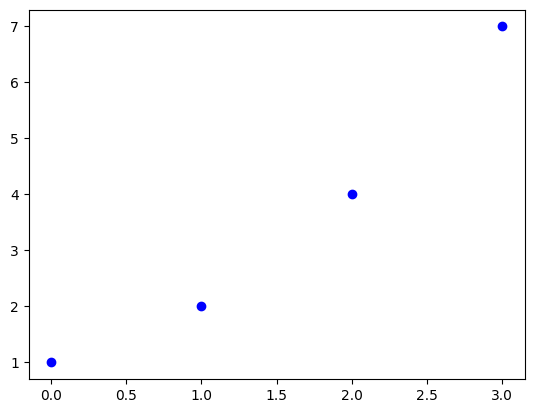

In [12]:
plt.scatter(t_i, x_i, color='blue', label='Data Points')

In [41]:

# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])

#print(SSE_poly)

# Compute the partial derivatives with respect to x0 and beta
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

#print(" ")
#print("Partials:")
#print(partial_x0)
#print(partial_b)
#print(" ")

# Compute the Groebner basis for the system of equations given by the partial derivatives
B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')
# The result 'B' is a Groebner basis for the ideal generated by partial_x0 and partial_beta
print("Groebner Basis:")
print(" ")
for poly in B:
    print(poly, "\n")

Groebner Basis:
 
7221619851953937787698918587683758839907306373050719059446435433003092151219805516987753924039587586423943*b**17/31153347512884941865357400498188872620491812124467229378814302781865054681716432969770508636543632290856300 - 51438103827468719741147482348123355351960473713451795519311982161209433436697776984592195203788364045635199390387*b**16/8722937303607783722300072139492884333737707394850824226068004778922215310880601231535742418232217041439764000 - 15702412799949189534100838755035187714168319893188409807861112923623124444284954914971012974657071862480754762213139861*b**15/52337623821646702333800432836957306002426244369104945356408028673533291865283607389214454509393302248638584000 + 898462386063903324380166585381727185516347030277566966004661723456993502572222135171068020499094801707171063206669*b**14/52337623821646702333800432836957306002426244369104945356408028673533291865283607389214454509393302248638584000 - 201656635863463123459314874212778578537261180527500285

In [42]:
def sturm_sequence(p):
    p0 = p
    p1 = diff(p, b)
    sturm_seq = [p0, p1]

    # Generate the rest of the Sturm sequence using sympy's polynomial division
    while not sturm_seq[-1].is_zero:
        p_i, remainder = sturm_seq[-2].as_expr(), sturm_seq[-1].as_expr()
        div_result = Poly(p_i, b).div(Poly(remainder, b))
        sturm_seq.append(-div_result[1])

    # Remove the last polynomial if it's zero.
    if sturm_seq[-1].is_zero:
        sturm_seq.pop()

    return [p.as_expr() for p in sturm_seq]

def count_sign_changes(sequence, value):
    signs = [p.subs(b, value) for p in sequence]
    sign_changes = 0
    previous_sign = None
    for sign in signs:
        current_sign = sign > 0
        if previous_sign is not None and current_sign != previous_sign:
            sign_changes += 1
        previous_sign = current_sign

    return sign_changes

def count_positive_roots(p):
    sturm_seq = sturm_sequence(Poly(p, b))

    # Count sign changes at positive infinity and zero.
    sign_changes_at_inf = count_sign_changes(sturm_seq, 1e10)  # Simulate positive infinity.
    sign_changes_at_zero = count_sign_changes(sturm_seq, 0) #INCLUDING 0

    return sign_changes_at_zero - sign_changes_at_inf 

# Example usage:
#x = symbols('x')
#p = x**2 - 6*x # Define your polynomial here.




num_positive_roots = count_positive_roots(B[1])

print(f'Number of positive roots: {num_positive_roots}')


Number of positive roots: 1


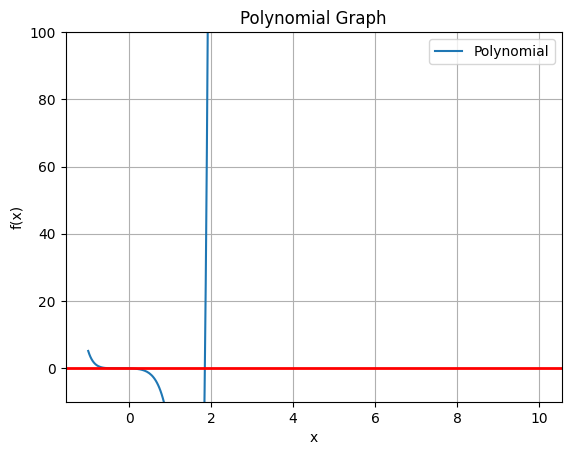

In [43]:
#Checking the number of positive roots (Graphically )

# Define your polynomial function
def poly_func(b):
    return b**10 - 49199*b**9/280700 + 1699*b**8/2807 - 7396*b**7/2807 - 5919*b**6/2807 - 1760601*b**5/280700 - 14937*b**4/2807 - 61543*b**3/20050 - 4306*b**2/2807 - 1102*b/2807 - 200/2807 


# Generate x values
x_values = np.linspace(-1, 10, 400)  # Adjust range and density as needed
y_values = poly_func(x_values)

# Plotting
plt.plot(x_values, y_values, label='Polynomial')
plt.axhline(0, color='red', lw=2)  # X-axis
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Graph')
plt.ylim(-10, 100)
plt.show()

In [44]:
#Checking Number of Positive roots NUMBERICALLY using sympy

x = symbols('x')
# Define your polynomial
polynomial = poly_func(x)

# Solve polynomial
roots = solve(polynomial, x)

# Filter positive roots
positive_roots_symbolic = [root.evalf() for root in roots if root.is_real and root > 0]

print(f"Symbolically found positive roots: {positive_roots_symbolic}")


Symbolically found positive roots: [1.84598025888549]


In [45]:
# How many points can Groebner function handle within reasonable 3min on my laptop.

# Using GROEBNER BASIS to find number of minimas (4 datapoint exponential case)

# Define the symbolic variables
x0, b = sp.symbols('x0 b')

# Example data points (replace with your actual data)
# Must be rational for Groebner function to work...
x_i = [1, 2, sp.Rational(401, 100), 7, 18, 33, 69, 130, 260, 555, 1030]  # Data
t_i = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Time

#plt.scatter(t_i, x_i, color='blue', label='Data Points')


# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])

#print(SSE_poly)

# Compute the partial derivatives with respect to x0 and beta
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

#print(" ")
#print("Partials:")
#print(partial_x0)
#print(partial_b)
#print(" ")

# Compute the Groebner basis for the system of equations given by the partial derivatives
B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')
# The result 'B' is a Groebner basis for the ideal generated by partial_x0 and partial_beta
print("Groebner Basis:")
print(" ")
for poly in B:
    print(poly, "\n")

Groebner Basis:
 
-61236361560139996527296610819902124977564221627507049771029694475014476300920147873673528229835000*b**37/152575270429358172674253896003394089073092473682478514091438081893516008416175598838202468135423766411 - 7828710259172606855894891204598277288321656075293433885390940251135130096557189908465417480227500*b**36/152575270429358172674253896003394089073092473682478514091438081893516008416175598838202468135423766411 - 702384079455216689317571176819491997634281371205519721466236847822291617992129421080901656335000*b**35/6633707409972094464097995478408438655351846681846891917019047038848522105051112992965324701540163757 + 139541535437031835695604471964537648329930234651682755226413898008368053766195494749229925543978000*b**34/152575270429358172674253896003394089073092473682478514091438081893516008416175598838202468135423766411 + 334708980234566124394404307844356654027485766890062161093775197545104703122643368729185753567430772500*b**33/663370740997209446409799547840843865

In [167]:
def generate_almost_exponential_data(n, initial_value=1, growth_rate=2, noise=0.1, limit=10000):
    """
    Generate n data points that follow an almost exponential trend.

    Parameters:
    - n: Number of data points to generate.
    - initial_value: Starting value of the exponential function.
    - growth_rate: Base growth rate of the exponential function.
    - variability: Maximum percentage of variability to apply to each data point.

    Returns:
    - x_i: List of n data points.
    - t_i: List of n time points.
    """
    t_i = list(range(n))  # Generate time points from 0 to n-1
    x_i = []

    for t in t_i:
        # Calculate the exact exponential value
        exact_value = initial_value * growth_rate ** t

        # Apply variability: Randomly adjust the growth rate within the variability range
        adjusted_growth_rate = growth_rate * (1 + random.uniform(-noise, noise))
        adjusted_value = initial_value * adjusted_growth_rate ** t

        # Ensure the output is rational for compatibility with Groebner function
        rational_value = sp.Rational(int(adjusted_value * 100), 100)

        x_i.append(min(rational_value, 10000))
    
    
    #print(t_i, x_i)
    return x_i, t_i



In [226]:
# Looking at the landscape of a multi-minimum case

num_datapoints = 6
initial_value = 1
growth_rate = 2
noise = 

x_i, t_i = generate_almost_exponential_data(num_datapoints, initial_value, growth_rate, noise)

Number of positive roots: 2


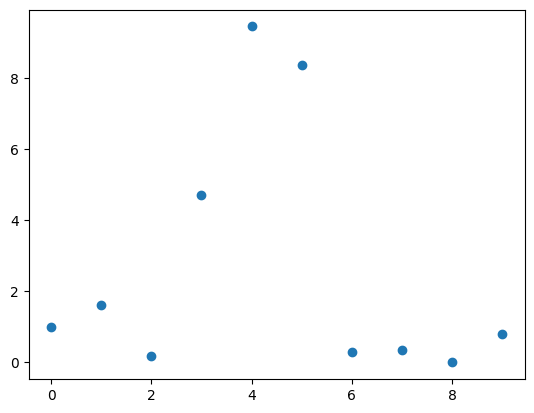

In [359]:
# Looking at the landscape of a multi-minimum case

num_datapoints = 10
initial_value = 1
growth_rate = 1
noise = 1

x_i, t_i = generate_almost_exponential_data(num_datapoints, initial_value, growth_rate, noise)

plt.scatter(t_i, x_i)

# Construct the SSE polynomial
SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])

#print(SSE_poly)

# Compute the partial derivatives with respect to x0 and beta
partial_x0 = sp.diff(SSE_poly, x0)
partial_b = sp.diff(SSE_poly, b)

#print(" ")
#print("}Partials:")
#print(partial_x0)
#print(partial_b)
#print(" ")

# Compute the Groebner basis for the system of equations given by the partial derivatives
B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

 
num_positive_roots = count_positive_roots(B[1])

print(f'Number of positive roots: {num_positive_roots}')

In [360]:
b1, b2 = positive_roots_symbolic[0], positive_roots_symbolic[1]

(x0_1, alpha_1), (x0_2, alpha_2) = find_x0_alpha_pairs(B, b1, b2)

print((x0_1, alpha_1), (x0_2, alpha_2))

(1.02194980967588, -3.53683380722468) (3.82702125044816e+25, 1.97853731686742)


In [302]:
print(x_i)
print(t_i)

[1, 137/50, 397/50, 527/100, 9/100, -11/50, 877/100, -1/5]
[0, 1, 2, 3, 4, 5, 6, 7]


In [307]:
def find_x0_alpha_pairs(G, b1, b2):
    # Extract the first equation from the Groebner basis
    first_eq = G[0]
    
    # Symbols
    x0, b = sp.symbols('x0 b')
    
    # Solve for x0 for each b value
    x0_1_solutions = sp.solve(first_eq.subs(b, b1), x0)
    x0_2_solutions = sp.solve(first_eq.subs(b, b2), x0)
    
    # Calculate alpha for each b value
    alpha_1 = sp.log(b1)
    alpha_2 = sp.log(b2)
    
    # Assuming we're interested in the first solution for x0 if there are multiple solutions
    if x0_1_solutions:
        x0_1 = x0_1_solutions[0]
    else:
        x0_1 = None
    
    if x0_2_solutions:
        x0_2 = x0_2_solutions[0]
    else:
        x0_2 = None
    
    # Return the (x0, alpha) pairs
    return (x0_1, alpha_1), (x0_2, alpha_2)

# Example usage:
# G is your Groebner basis
# b1, b2 are your b values

In [310]:
b1, b2 = positive_roots_symbolic[0], positive_roots_symbolic[1]

(x0_1, alpha_1), (x0_2, alpha_2) = find_x0_alpha_pairs(B, b1, b2)

print((x0_1, alpha_1), (x0_2, alpha_2))

(1.02987572158040, -3.53683380722468) (1.30965804866387e+20, 1.97853731686742)


TypeError: can't multiply sequence by non-int of type 'Float'

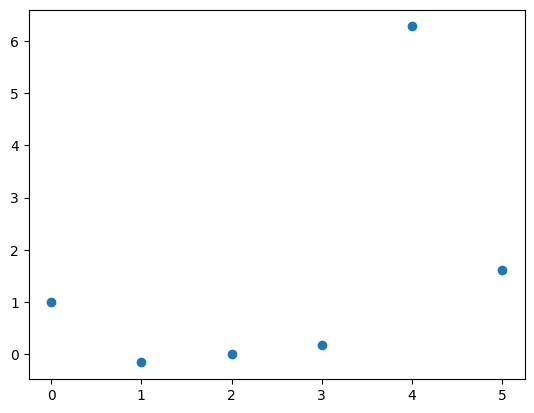

In [206]:

plt.scatter(t_i, x_i)

# Parameters for the first pair (x0_1, alpha_1)
model_values_1 = model(t_i, x0_1, alpha_1)
plt.plot(t_i, model_values_1, label='Model 1: x0_1 * exp(alpha_1 * t)')

# Parameters for the second pair (x0_2, alpha_2)
model_values_2 = model(t_i, x0_2, alpha_2)
plt.plot(t_i, model_values_2, label='Model 2: x0_2 * exp(alpha_2 * t)')

# Labels and legend
plt.xlabel('Time')
plt.ylabel('Data Points')
plt.title('Overlay of Data and Models')
plt.legend()

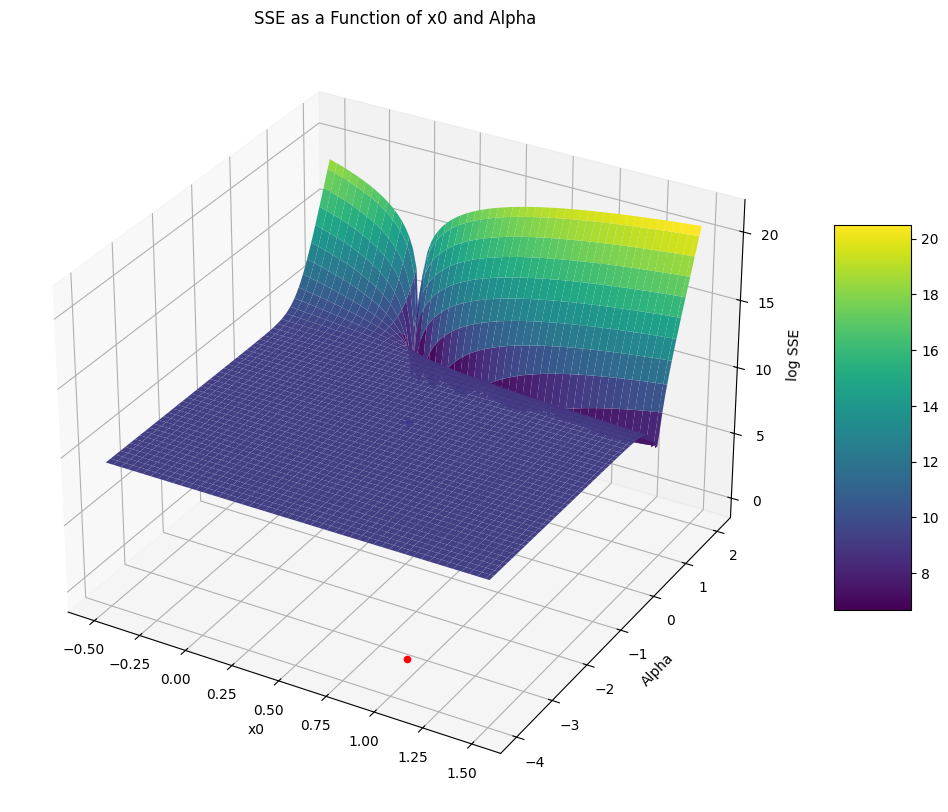

In [123]:
data = pd.DataFrame({'Time': t_i, 'Data': x_i})
# Plotting the SSE/Error as a function of x0 and alpha, with the data fixed. 
# This gives a visualization of minimas...


# Define the range for alpha and x0
alpha_range = np.linspace(-4, 2, 100)  # Adjust the range as needed
x0_range = np.linspace(-0.5, 1.5, 100)  # Adjust the range as needed


# Generate a meshgrid for x0 and alpha ranges
X0, Alpha = np.meshgrid(x0_range, alpha_range)


# Initialize an array to store SSE values
SSE_values = np.zeros(X0.shape)


# Compute SSE for each combination of x0 and alpha
for i in range(len(alpha_range)):
    for j in range(len(x0_range)):
        params = (X0[i, j], Alpha[i, j])
        SSE_values[i, j] = sse(params, data)

        
# Creating the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')


# Surface plot with log scale (since data is exponential)
surf = ax.plot_surface(X0, Alpha, np.log(SSE_values), cmap='viridis', edgecolor='none')


# Labels and title
ax.set_xlabel('x0')
ax.set_ylabel('Alpha')
ax.set_zlabel('log SSE')
ax.set_title('SSE as a Function of x0 and Alpha')

point1 = (0.996363525052302, -3.53683380722468)
point2 = (-0.0554752349853516, 1.97853731686742)
ax.scatter(*point1, color='red', label='Point 1')
ax.scatter(*point2, color='blue', label='Point 2')

# Colorbar to show the SSE scale better/clearer
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()



In [114]:
print(B)
print(" ")
print(B[1])

GroebnerBasis([-11750621732058509637999836283490741229*b**17/34628778066077389567941276694991678985 - 4816360157642688584138321611976233532956*b**16/2020012053854514391463241140541181274125 + 1461150784494650560522643226291816593289*b**15/43675936299557067923529538173863378900 + 89176518987827092248893535722742772527727*b**14/24240144646254172697558893686494175289500 + 822431377816025820099199603438924958990319*b**13/16160096430836115131705929124329450193000 + 271960474691991484263199011524337374195147*b**12/24240144646254172697558893686494175289500 + 157201946849595027041589032504800124966297*b**11/2308585204405159304529418446332778599000 + 75744405287644668713010246383199833290007*b**10/4040024107709028782926482281082362548250 + 1382361318009576831320413261080840998229269*b**9/16160096430836115131705929124329450193000 + 4749113887728278142847579061805521815153*b**8/187908098032978082926813129352668025500 + 237781191251743797505309157416891351290637*b**7/230858520440515930452941844633

In [81]:
# Testing number of positive roots for various NOISE LEVELS
# All else constant

num_datapoints = 6
initial_value = 1
growth_rate = 2

noise = [0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 1,1.2, 1.5, 2, 3, 4, 10, 20, 40, 100, 500]


for level in noise:
    tmp = []
    for i in range(10):
        x_i, t_i = generate_almost_exponential_data(num_datapoints, initial_value, growth_rate, level)
        # Construct the SSE polynomial
        SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])
    
        # Compute the partial derivatives with respect to x0 and beta
        partial_x0 = sp.diff(SSE_poly, x0)
        partial_b = sp.diff(SSE_poly, b)
    
        # Compute the Groebner basis for the system of equations given by the partial derivatives
        B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

        num_positive_roots = count_positive_roots(B[1])

        tmp.append(num_positive_roots)
    
    
    print(f'Number of positive roots for noise={level}: {np.mean(tmp)}')





Number of positive roots for noise=0.1: 1.0
Number of positive roots for noise=0.2: 1.0
Number of positive roots for noise=0.5: 1.0
Number of positive roots for noise=0.6: 1.0
Number of positive roots for noise=0.7: 1.0
Number of positive roots for noise=0.8: 1.0
Number of positive roots for noise=1: 1.0
Number of positive roots for noise=1.2: 1.1
Number of positive roots for noise=1.5: 1.2
Number of positive roots for noise=2: 1.3
Number of positive roots for noise=3: 1.8
Number of positive roots for noise=4: 1.6
Number of positive roots for noise=10: 2.2
Number of positive roots for noise=20: 2.5
Number of positive roots for noise=40: 2.3
Number of positive roots for noise=100: 1.9
Number of positive roots for noise=500: 2.8


In [65]:
# Testing number of positive roots for different NUMBER OF DATAPOINTS
# All else constant

initial_value = 1
growth_rate = 2
noise = 2

x, t = generate_almost_exponential_data(50, initial_value, growth_rate, noise)


for n in range(4, 100, 2):
    #tmp = []
    #for i in range(10):
    
    x_i, t_i = x[:n], t[:n]
        # Construct the SSE polynomial
    SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])
    
        # Compute the partial derivatives with respect to x0 and beta
    partial_x0 = sp.diff(SSE_poly, x0)
    partial_b = sp.diff(SSE_poly, b)
    
        # Compute the Groebner basis for the system of equations given by the partial derivatives
    B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

    num_positive_roots = count_positive_roots(B[1])

     #   tmp.append(num_positive_roots)
    
    print(f'Number of positive roots for number of points={n}: {num_positive_roots}')





Number of positive roots for number of points=4: 1
Number of positive roots for number of points=6: 1
Number of positive roots for number of points=8: 0
Number of positive roots for number of points=10: 2
Number of positive roots for number of points=12: 1


KeyboardInterrupt: 

In [74]:
# Removing datapoints, seeing how that affects number of minimas.

def remove_random_pairs(arr1, arr2):
    n = len(arr1)
    if n == 0:
        return 
    
    # Generate a random index. Since Python is 0-indexed, we adjust by -1.
    n = random.randint(1, n) - 1
    
    # Remove the nth element from both arrays
    del arr1[n]
    del arr2[n]
    
    return arr1, arr2




# Defining parameters
num_datapoints = 10
initial_value = 1
growth_rate = 2
nosie = 2

#Generate Data
x_i, t_i = generate_almost_exponential_data(num_datapoints, initial_value, growth_rate, noise)
    
for n in range(6):
    SSE_poly = sum([(x - x0 * b**t)**2 for x, t in zip(x_i, t_i)])
    # Compute the partial derivatives with respect to x0 and beta
    partial_x0 = sp.diff(SSE_poly, x0)
    partial_b = sp.diff(SSE_poly, b)
    # Compute the Groebner basis for the system of equations given by the partial derivatives
    B = sp.groebner([partial_x0, partial_b], x0, b, order='lex')

    num_positive_roots = count_positive_roots(B[1])
    print(x_i)
    print(t_i)
    print(num_positive_roots)
    x_i, t_i = remove_random_pairs(x_i, t_i)






[1, 33/100, 517/100, 81/10, 22321/50, 53/100, 0, 7131/50, 0, 21440971/100]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
[1, 33/100, 517/100, 81/10, 22321/50, 53/100, 0, 7131/50, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
1
[1, 33/100, 517/100, 81/10, 22321/50, 53/100, 7131/50, 0]
[0, 1, 2, 3, 4, 5, 7, 8]
1
[1, 33/100, 517/100, 81/10, 22321/50, 53/100, 7131/50]
[0, 1, 2, 3, 4, 5, 7]
1
[1, 517/100, 81/10, 22321/50, 53/100, 7131/50]
[0, 2, 3, 4, 5, 7]
1
[1, 517/100, 81/10, 22321/50, 7131/50]
[0, 2, 3, 4, 7]
1


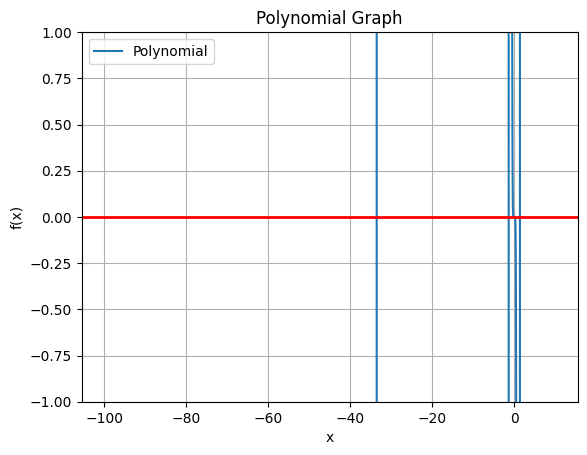

In [33]:
#Checking the number of positive roots (Graphically )

# Define your polynomial function
def poly_func(b):
    return b**18 + 7774373658036*b**17/233921806117 - 4553233305389*b**16/467843612234 + 133774330632*b**15/233921806117 - 2776369633727*b**14/467843612234 - 30909466044705*b**13/935687224468 - 492111743306*b**12/233921806117 - 31179962865099*b**11/467843612234 + 404074815072*b**10/233921806117 - 93810391157911*b**9/935687224468 + 1300261466400*b**8/233921806117 - 31273241267480*b**7/233921806117 + 4769587985015*b**6/233921806117 - 888065821209*b**5/935687224468 + 11067417689*b**4/467843612234 - 1475228009*b**3/467843612234 + 75690347*b**2/467843612234 - 287111*b/233921806117 + 8450/233921806117


# Generate x values
x_values = np.linspace(-100, 10, 4000)  # Adjust range and density as needed
y_values = poly_func(x_values)

# Plotting
plt.plot(x_values, y_values, label='Polynomial')
plt.axhline(0, color='red', lw=2)  # X-axis
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Graph')
plt.ylim(-1, 1)
plt.show()